# Linear Regression

### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
pd.set_option('display.max_columns', None)

In [53]:
df = pd.read_csv('linear_reg.csv')
df.head(10)

,x,y
0,0.000000,4875.681920
1,1.004016,3475.944260
2,2.008032,5375.193619
3,3.012048,5696.649452
4,4.016064,4662.372126
5,5.020080,5303.223917
6,6.024096,6026.382338
7,7.028112,3838.603415
8,8.032129,4947.094183
9,9.036145,4970.456372


<Axes: xlabel='x', ylabel='y'>

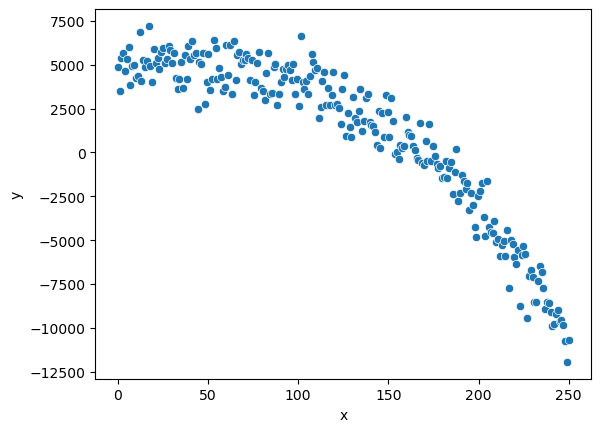

In [54]:
sns.scatterplot(x=df['x'],y=df['y'])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
X = df[['x']].to_numpy() #mátrixá alakítás
X[:10]

array([[0.        ],
       [1.00401606],
       [2.00803213],
       [3.01204819],
       [4.01606426],
       [5.02008032],
       [6.02409639],
       [7.02811245],
       [8.03212851],
       [9.03614458]])

In [57]:
y = df['y'].to_numpy() #mátrixá alakítás
y[:10]

array([4875.68192029, 3475.94426027, 5375.19361891, 5696.64945213,
       4662.37212621, 5303.22391661, 6026.38233767, 3838.60341505,
       4947.09418277, 4970.45637166])

In [58]:
reg = LinearRegression()
reg.fit(X,y) #regresszió lefuttatása

LinearRegression()

In [59]:
reg.coef_ #együttható vektor, egyenes egyenlete y=-57.82x + 8234.16

array([-57.81943408])

In [60]:
reg.intercept_ # eltolás paramétere --> konstans tag

8234.159086573558

The result of the linear regression is the coefficients $\theta$ 's of the equation:
<br><br>
<center>$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $</center>

* `coef_` returns a list of $\theta_1, \theta_2, ... , \theta_n$
* `intercept_` returns the value of $\theta_0$

In the previous example, we only have $x_1$, thus only one coefficient $\theta_1$

To draw the result, we just have to replace the coefficients and intercept in above equation and draw the resulting line

<Axes: xlabel='x', ylabel='y'>

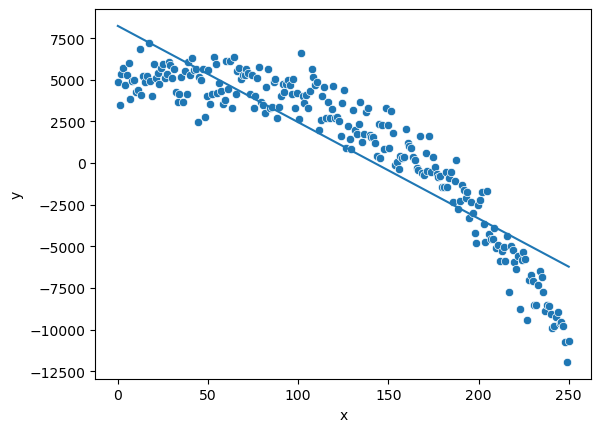

In [61]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['x'] # becsült y
sns.scatterplot(x=df['x'],y=df['y'])
sns.lineplot(x=df['x'],y=h)

<b>Note</b>: You can use seaborn's `regplot` function that will fit the Linear Regression then plot both scattered points and linear regression result. As below:

<Axes: >

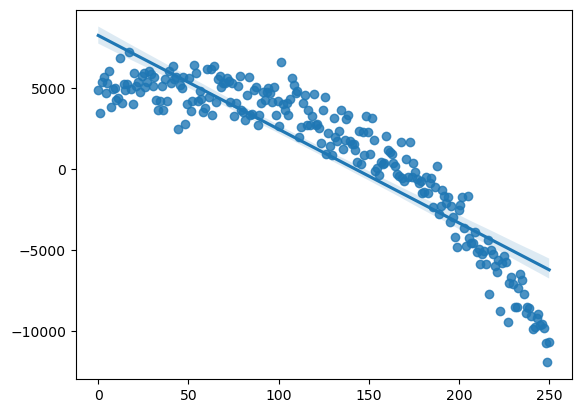

In [62]:
sns.regplot(x=X,y=y)

<hr />

## Linear Regression for a non-linear model

Clearly, above solution is not convenient. The linear model above $h(x) = \theta_0 + \theta_1 x_1$ has a large error, let's measure it:

In [63]:
m = y.shape[0]
error = np.sum((h-y)**2)/(2*m)
error**0.5 # átlagos tévedés

1421.8386254959871

Let's take the following model: $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$

Then replace the values $x_1^2$ with a new variable called $x_2$, and $x_1^3$ with $x_3$.

The model becomes:
$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$


This can be done easily using pandas by introducing new columns:

In [64]:
df['x2'] = df['x']**2
df['x3'] = df['x']**3
df.head()

,x,y,x2,x3
0,0.000000,4875.681920,0.000000,0.000000
1,1.004016,3475.944260,1.008048,1.012097
2,2.008032,5375.193619,4.032193,8.096773
3,3.012048,5696.649452,9.072434,27.326609
4,4.016064,4662.372126,16.128772,64.774185


In [65]:
X = df[['x','x2','x3']].to_numpy()
y = df['y'].to_numpy()

In [66]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression()

In [67]:
reg2.coef_

array([ 2.50798685e+00, -4.30449638e-02, -8.80001639e-04])

In [68]:
reg2.intercept_

5043.113943113958

So the final solution is:

$h(x) = 5043 + 2.507 x_1 -0.043 x_2 - 0.00088 x_3$

which is equivalent to:

$h(x) = 5043 + 2.507 x_1 -0.043 x_1^2 - 0.00088 x_1^3$

Let's draw the result:

<Axes: xlabel='x', ylabel='y'>

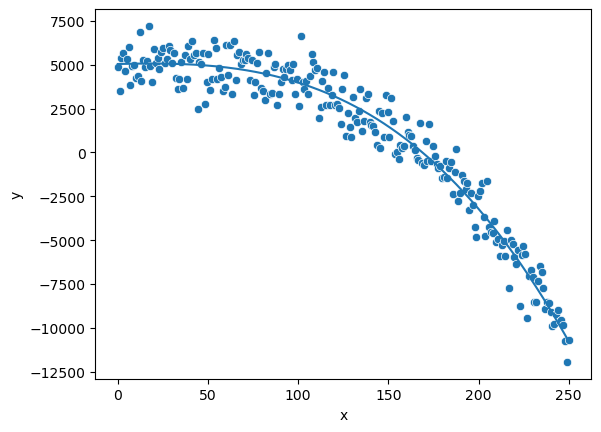

In [69]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]
theta2 = reg2.coef_[1]
theta3 = reg2.coef_[2]
h = theta0 + theta1 * df['x'] + theta2 * df['x2'] + theta3 * df['x3']
sns.scatterplot(x=df['x'],y=df['y'])
sns.lineplot(x=df['x'],y=h)

Clearly, above line fits the dataset better. And cost is:

In [70]:
m = y.shape[0]
error2 = np.sum((h-y)**2)/(2*m)
error2**0.5

672.8696222086219

In [71]:
error/error2

4.4651779604887825

Solution improved 4.5 times with the new model

### How to predict new values?

if you have a value of $x$, you can either replace the value in previous $h(x)$ equation, or use `predict` function below:

In [72]:
reg2.predict([[55,55**2,55**3]]) #visszaadja az x-hez tartozó y-t

array([4904.43193151])